In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
device = torch.device('mps')

In [11]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [12]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias=False).to(device)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False).to(device)

    def forward(self, X):
        hidden_layer = self.W(X).to(device)
        output_layer = self.WT(hidden_layer).to(device)
        return output_layer

word_sequence:['apple', 'banana', 'fruit', 'banana', 'orange', 'fruit', 'orange', 'banana', 'fruit', 'dog', 'cat', 'animal', 'cat', 'monkey', 'animal', 'monkey', 'dog', 'animal']
word_list:['banana', 'dog', 'animal', 'orange', 'cat', 'apple', 'monkey', 'fruit']
word_dict:{'banana': 0, 'dog': 1, 'animal': 2, 'orange': 3, 'cat': 4, 'apple': 5, 'monkey': 6, 'fruit': 7}
voc_size:8
target:0
target:7
target:0
target:3
target:7
target:3
target:0
target:7
target:1
target:4
target:2
target:4
target:6
target:2
target:6
target:1
skip_grams:[[0, 5], [0, 7], [7, 0], [7, 0], [0, 7], [0, 3], [3, 0], [3, 7], [7, 3], [7, 3], [3, 7], [3, 0], [0, 3], [0, 7], [7, 0], [7, 1], [1, 7], [1, 4], [4, 1], [4, 2], [2, 4], [2, 4], [4, 2], [4, 6], [6, 4], [6, 2], [2, 6], [2, 6], [6, 2], [6, 1], [1, 6], [1, 2]]
Epoch: 1000 cost = 1.845865
Epoch: 2000 cost = 2.316225
Epoch: 3000 cost = 0.841617
Epoch: 4000 cost = 0.817318
Epoch: 5000 cost = 1.132278


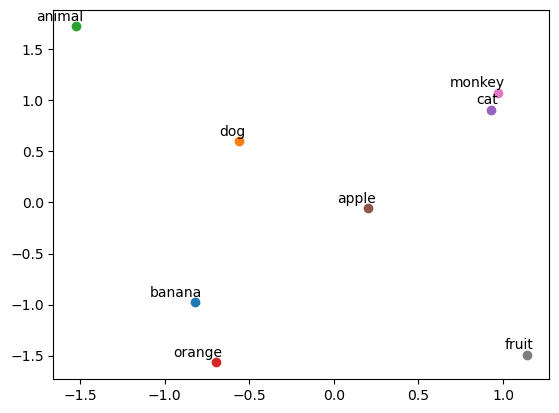

In [15]:
if __name__ == '__main__':
    batch_size = 2
    embedding_size = 2
    sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]
    word_sequence = " ".join(sentences).split()
    print(f'word_sequence:{word_sequence}')
    word_list = " ".join(sentences).split()
    word_list = list(set(word_list))
    print(f'word_list:{word_list}')
    word_dict = {w: i for i, w in enumerate(word_list)}
    print(f'word_dict:{word_dict}')
    voc_size = len(word_list)
    print(f'voc_size:{voc_size}')

    skip_grams = []
    for i in range(1, len(word_sequence) - 1):
        target = word_dict[word_sequence[i]]
        print(f'target:{target}')
        context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
        for w in context:
            skip_grams.append([target, w])
    print(f'skip_grams:{skip_grams}')

    model = Word2Vec()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(5000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch).to(device)
        target_batch = torch.Tensor(target_batch).to(device)

        optimizer.zero_grad()
        output = model(input_batch)

        loss = criterion(output, target_batch)
        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        loss.backward()
        optimizer.step()
    
    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()